In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request


In [3]:
req = urllib.request.urlopen('https://picsum.photos/100/100.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
gray = gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [4]:
def bilinear(img,rn,cn):
  Nr = img.shape[0]
  Nc = img.shape[1]

  a = rn - int(rn)
  b = cn - int(cn)
  rn = int(rn)
  cn = int(cn)

  if rn < 0 or cn < 0 or rn > Nr - 2 or cn > Nc - 2:
      return 0
  if a == 0 and b == 0:
    return img[rn, cn]
  if rn == Nr - 1 and cn == Nc - 1:
    return img[rn, cn]
  if b == 0 or cn == Nc - 1:
    return (1 - a) * img[rn, cn] + a * img[rn + 1, cn]
  if a == 0 or rn == Nr - 1:
    return (1 - b) * img[rn, cn] + b * img[rn, cn + 1]
  y = (1 - a) * (1 - b) * img[rn, cn] + (1 - a) * b * img[rn, cn +
                                                          1] + a * (1 - b) * img[rn + 1, cn] + a * b * img[rn + 1, cn + 1]
  return y 


In [5]:
rn = 1.5
cn = 2.8

img = np.array([
    [7,8,1,4,1],
    [10,11,5,3,4],
    [1,20,6,9,12],
    [13,1,15,14,0]
], dtype=np.float32)

print(bilinear(img,1.5,2.8))

5.9


In [6]:
def affineTransform(img, tMatrix):
  #print(T)
  Nr = img.shape[0]
  Nc = img.shape[1]
  img_transformed = np.zeros((Nr, Nc))
  for r in range(Nr):
    for c in range(Nc):
      cn = int(tMatrix[0, 0]*c + tMatrix[0, 1]*r + tMatrix[0, 2])
      rn = int(tMatrix[1, 0]*c + tMatrix[1, 1]*r + tMatrix[1, 2])
      if (rn >= 0 and cn >= 0 and rn < Nr and cn < Nc):
        img_transformed[rn, cn] = img[r, c]
  return img_transformed


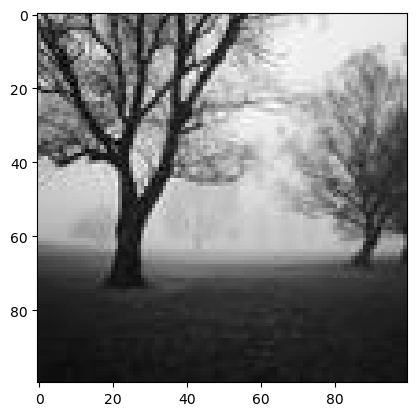

In [7]:
plt.imshow(gray, cmap='gray')

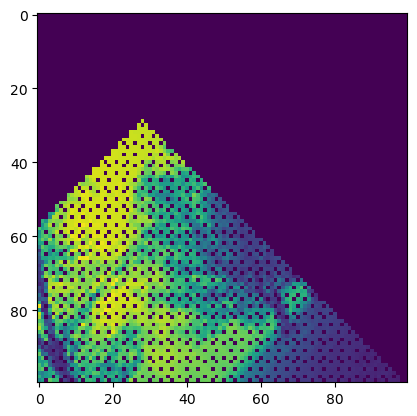

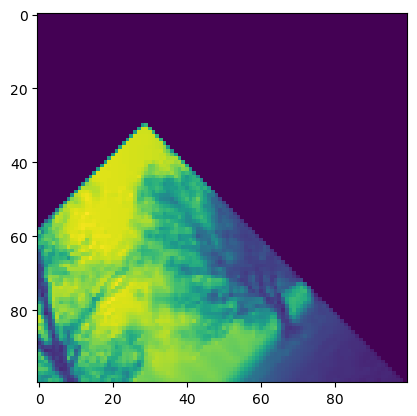

In [8]:
rot= np.array([
    [np.cos(-np.pi/4), -np.sin(-np.pi/4),
     100 - 100*np.cos(-np.pi/4) + 100*np.sin(-np.pi/4)],
    [np.sin(-np.pi/4), np.cos(-np.pi/4), 100 - 100 *
     np.sin(-np.pi/4) - 100*np.cos(-np.pi/4)],
    [0, 0, 1]
])



scalado = affineTransform(gray, rot)
plt.imshow(scalado)
plt.show()

T_AfinCV = rot.flatten()[:6].reshape(2, 3)
img_transformed = cv2.warpAffine(gray, T_AfinCV, (gray.shape))
plt.imshow(img_transformed)
plt.show()


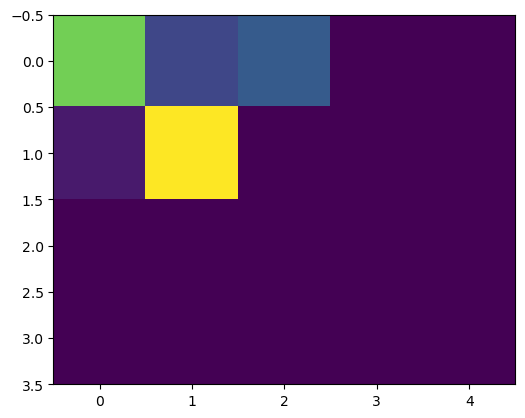

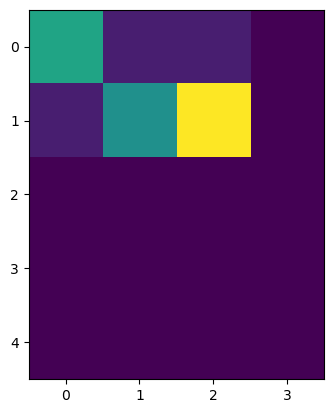

In [9]:
# scaleMtx = np.array([
#     [np.cos(45 * np.pi/180), -np.sin(45 * np.pi/180),
#      100 - 100*np.cos(45 * np.pi/180) + 100*np.sin(45 * np.pi/180)],
#     [np.sin(45 * np.pi/180), np.cos(45 * np.pi/180), 100 - 100 *
#      np.sin(45 * np.pi/180) - 100*np.cos(45 * np.pi/180)],
#     [0, 0, 1]
# ])
scaleMtx= np.array([
    [.5,0,0],
    [0,.5, 0],
    [0,0,1]
])
scalado= affineTransform(img,scaleMtx)
plt.imshow(scalado)
plt.show()

T_AfinCV = scaleMtx.flatten()[:6].reshape(2,3)
img_transformed = cv2.warpAffine(img, T_AfinCV,(img.shape))
plt.imshow(img_transformed)
plt.show()

In [10]:
print(scalado)

[[11.  3.  4.  0.  0.]
 [ 1. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [11]:
print(img_transformed)

[[ 7.  1.  1.  0.]
 [ 1.  6. 12.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


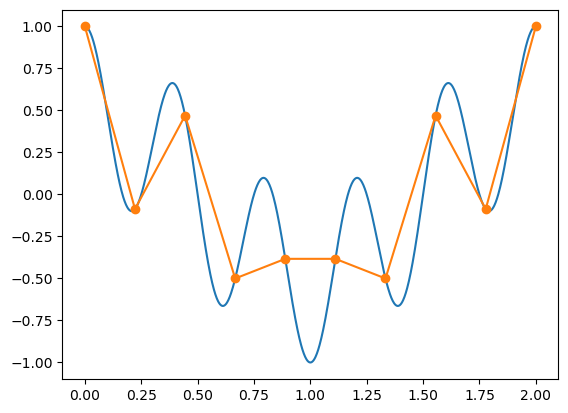

In [12]:


#Tiempo minimo y maximo

tmin = 0

tmax = 2

#Se define el tiempo de la segnal.

t = np.linspace(tmin, tmax, 1000)

#Se define la segnal de muestreo

x = np.cos(2*np.pi*t) * np.cos(3*np.pi*t)

t2 = np.linspace(tmin, tmax, 10)
x2 = np.cos(2*np.pi*t2) * np.cos(3*np.pi*t2)

#Se grafica el tiempo y la segnal.

plt.plot(t, x)
plt.plot(t2, x2, 'o-')


In [13]:
def convolveDesacopladaDot(img, kernelx, kernely):

    # if(kernelx.size != kernely.size):
    #   raise Exception("Kernels deben ser del mismo tamaño")

    kernelx = np.flip(kernelx)
    kernely = np.flip(kernely)

    nrows, ncols = img.shape
    k_size = kernelx.size
    # krows, kcols = kernel.shape
    pad_size = (k_size - 1) // 2
    padded_img = np.pad(img, pad_size, mode='constant')
    # print(padded_img)
    output = np.zeros((nrows, ncols))

    output = np.array([convolveDot(img[i, :], kernelx) for i in range(nrows)])

    # print(output)
    output2 = np.zeros((nrows, ncols))
    output2 = np.array([convolveDot(output[:, j], kernely)
                       for j in range(ncols)]).T
    return output2


def convolveDot(signal, kernel):
    ker_size = kernel.size
    sig_size = signal.size
    # kernel = kernel[::-1]
    pad_size = (ker_size - 1) // 2
    padded_signal = np.pad(signal, pad_size, mode='constant')
    output = np.zeros(sig_size)
    output = [np.dot(padded_signal[k:k+ker_size], kernel)
              for k in range(sig_size)]

    return output


In [14]:
x = np.array([[7, 8, 1, 4, 2],
              [10, 11, 5, 3, 4],
              [1, 20, 6, 9, 12],
              [13, 1, 15, 14, 0]])
h = np.array(
    [[1, 4, 6, 4, 1],
     [2, 8, 12, 8, 2],
     [1, 4, 6, 4, 1],
     ])*1/64

h1 = np.array(
    [1, 4, 6, 4, 1])*1/8
h2 = np.array([1,2,1])*1/8

print(convolveDesacopladaDot(x, h1, h2))

[[4.046875 4.640625 3.53125  2.390625 1.546875]
 [6.015625 7.796875 6.6875   5.       3.515625]
 [6.09375  8.984375 9.265625 7.84375  5.3125  ]
 [4.46875  6.578125 7.671875 6.8125   4.      ]]


In [36]:
x = np.array([[7, 8, 1, 4, 2],
              [10, 11, 5, 3, 4],
              [1, 20, 6, 9, 12],
              [13, 1, 15, 14, 0]])
h = np.array(
    [[1, 4, 6, 4, 1],
     [2, 8, 12, 8, 2],
     [1, 4, 6, 4, 1],
     ])

In [37]:
from scipy.signal import convolve2d

scipi = convolve2d(x,h, mode='same',boundary='wrap')
print(scipi)

[[413 437 389 335 346]
 [492 521 428 348 387]
 [537 603 593 527 492]
 [458 519 554 514 451]]


In [16]:
from scipy.ndimage import convolve1d
h3 = np.array(
    [1, 4, 6, 4, 1])

x = np.array([[7, 8, 1, 4, 2],
              [10, 11, 5, 3, 4],
              [1, 20, 6, 9, 12],
              [13, 1, 15, 14, 0]])

convolve1d(x,h3, mode='wrap')




array([[ 87,  86,  63,  51,  65],
       [128, 133, 100,  75,  92],
       [149, 169, 165, 147, 138],
       [111, 132, 163, 158, 124]])

In [17]:
h4 = np.array([1,2,1])
x2 = np.array([[87,  86,  63,  51,  65],
               [128, 133, 100,  75,  92],
               [149, 169, 165, 147, 138],
               [111, 132, 163, 158, 124]])

convolve1d(x2,h4, mode='wrap',axis=0)

array([[413, 437, 389, 335, 346],
       [492, 521, 428, 348, 387],
       [537, 603, 593, 527, 492],
       [458, 519, 554, 514, 451]])

In [18]:
np.array([[413, 437, 389, 335, 346],
       [492, 521, 428, 348, 387],
       [537, 603, 593, 527, 492],
       [458, 519, 554, 514, 451]])*1/64

array([[6.453125, 6.828125, 6.078125, 5.234375, 5.40625 ],
       [7.6875  , 8.140625, 6.6875  , 5.4375  , 6.046875],
       [8.390625, 9.421875, 9.265625, 8.234375, 7.6875  ],
       [7.15625 , 8.109375, 8.65625 , 8.03125 , 7.046875]])

In [19]:
def replicate_padding(arr):
    """Perform replicate padding on a numpy array."""
    new_pad_shape = tuple(np.array(
        arr.shape) + 2)  # 2 indicates the width + height to change, a (512, 512) image --> (514, 514) padded image.
    # create an array of zeros with new dimensions
    padded_array = np.zeros(new_pad_shape)

    # perform replication
    padded_array[1:-1, 1:-1] = arr        # result will be zero-pad
    padded_array[0, 1:-1] = arr[0]        # perform edge pad for top row
    padded_array[-1, 1:-1] = arr[-1]     # edge pad for bottom row
    padded_array.T[0, 1:-1] = arr.T[0]   # edge pad for first column
    padded_array.T[-1, 1:-1] = arr.T[-1]  # edge pad for last column

    #at this point, all values except for the 4 corners should have been replicated
    padded_array[0][0] = arr[0][0]     # top left corner
    padded_array[-1][0] = arr[-1][0]   # bottom left corner
    padded_array[0][-1] = arr[0][-1]   # top right corner
    padded_array[-1][-1] = arr[-1][-1]  # bottom right corner

    return padded_array


In [28]:
x2

array([[ 87,  86,  63,  51,  65],
       [128, 133, 100,  75,  92],
       [149, 169, 165, 147, 138],
       [111, 132, 163, 158, 124]])

In [35]:
x2[3,1]

132